# Grocery Store Analysis

## Introduction


The crucial goals of exploratory data analysis on grocery store sales are to figure out:
- Sales performance;
- Seasonality in a year;
- Pattern findings in food consumption;

To get started, let's import the libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, we load the data from the csv file.

In [2]:
df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Supermart Grocery Sales - Retail Analytics Dataset.csv")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


The next step is to discover if there are missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Then we inspect the distribution of the numeric variables - Sales, Discount and Profit.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00
Discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35
Profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95


Let's find out if there are any duplicated values in DataFrame.

In [6]:
df.duplicated(keep=False).sum()

0

## Sales performance

We will analyze sales efficiency by regions, categories and subcategories.

The first result that we receive is sales in terms of regions.

In [7]:
results = df.groupby('Region').agg({'Sales':'sum',})
results

,Sales
Region,
Central,3468156
East,4248368
North,1254
South,2440461
West,4798743


Let's make a plot to visualize the sales results by regions. 

Text(0.5, 0, 'Region')

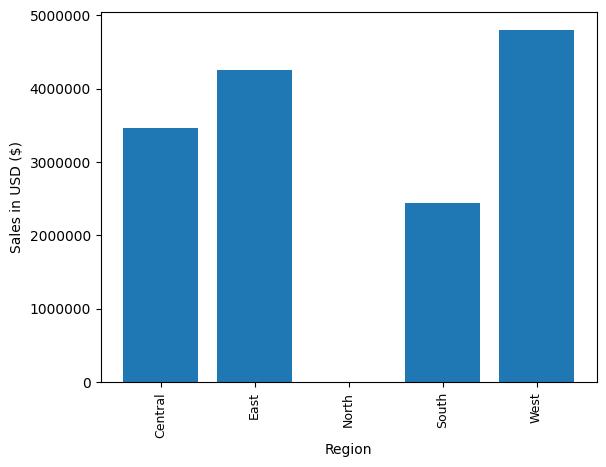

In [8]:
region = [region for region, df in df.groupby('Region')]

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.bar(region, results['Sales'])
plt.xticks(region, rotation = 'vertical', size = 9)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Region')

The next step is to receive the sales performance among categories.

In [9]:
results = df.groupby('Category').agg({'Sales':'sum',})
results

,Sales
Category,
Bakery,2112281
Beverages,2085313
"Eggs, Meat & Fish",2267401
Food Grains,2115272
Fruits & Veggies,2100727
Oil & Masala,2038442
Snacks,2237546


Text(0.5, 0, 'Category')

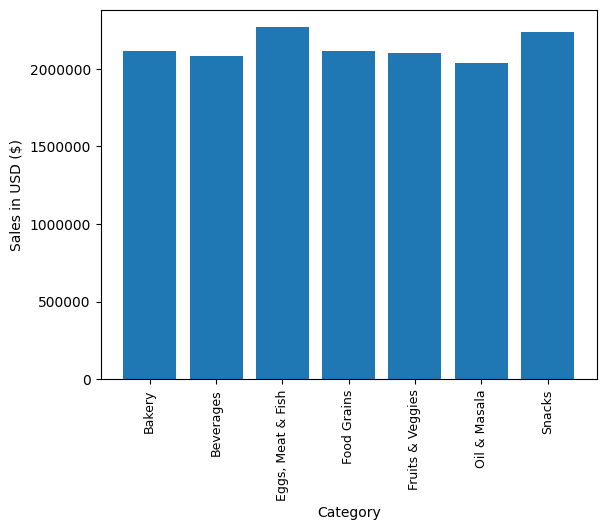

In [10]:
category = [category for category, df in df.groupby('Category')]

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.bar(category, results['Sales'])
plt.xticks(category, rotation = 'vertical', size = 9)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Category')

The last point of analyzing sales performance is to see the results by subcategories. 

In [11]:
results = df.groupby('Sub Category').agg({'Sales':'sum',})
results

,Sales
Sub Category,
Atta & Flour,534649
Biscuits,684083
Breads & Buns,742586
Cakes,685612
Chicken,520497
Chocolates,733898
Cookies,768213
Dals & Pulses,523371
Edible Oil & Ghee,668086


Text(0.5, 0, 'SubCategory')

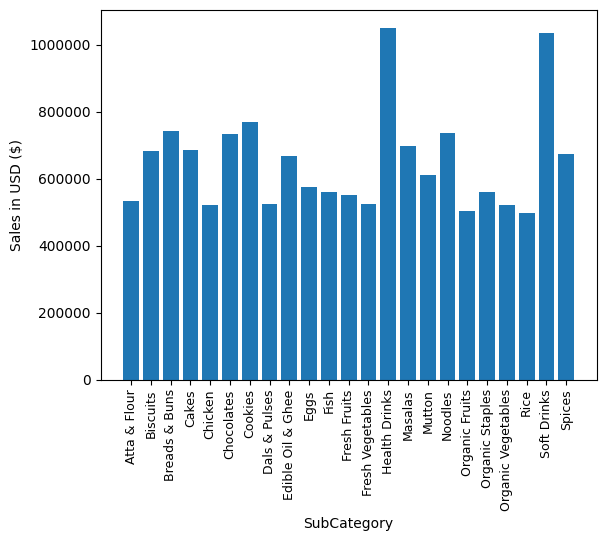

In [12]:
subcategory = [subcategory for subcategory, df in df.groupby('Sub Category')]

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.bar(subcategory, results['Sales'])
plt.xticks(subcategory, rotation = 'vertical', size = 9)
plt.ylabel('Sales in USD ($)')
plt.xlabel('SubCategory')


We are also able to make the analysis to discover the best-selling categories within regions and subcategories within regions and categories. Let's do it to deep dive in.

I would make a pivot table for each case and sort our tables by sales results in descending order.

In [45]:
region_category_pivot = pd.pivot_table(columns = ['Region','Category'], values = 'Sales', data = df, aggfunc = 'sum')

region_category_pivot = region_category_pivot.transpose()

region_category_pivot = region_category_pivot.sort_values(by=['Region','Sales'], ascending=False)

region_category_pivot

Sales
Region  Category                 
West    Bakery             714312
        Eggs, Meat & Fish  711966
        Food Grains        699652
        Snacks             689780
        Oil & Masala       662965
        Beverages          662247
        Fruits & Veggies   657821
South   Snacks             369357
        Bakery             361385
        Eggs, Meat & Fish  360963
        Food Grains        353069
        Fruits & Veggies   352162
        Beverages          344666
        Oil & Masala       298859
North   Oil & Masala         1254
East    Eggs, Meat & Fish  677830
        Oil & Masala       622071
        Snacks             619915
        Food Grains        598868
        Bakery             588241
        Beverages          577206
        Fruits & Veggies   564237
Central Snacks             558494
        Fruits & Veggies   526507
        Eggs, Meat & Fish  516642
        Beverages          501194
        Food Grains        463683
        Oil & Masala       453293
        Bakery             448343

In [44]:
region_subcategory_pivot = pd.pivot_table(columns = ['Region','Sub Category'], values = 'Sales', data = df, aggfunc = 'sum')

region_subcategory_pivot = region_subcategory_pivot.transpose()

region_subcategory_pivot = region_subcategory_pivot.sort_values(by=['Region','Sales'], ascending=False)

region_subcategory_pivot

Sales
Region  Sub Category              
West    Health Drinks       341884
        Soft Drinks         320363
        Cookies             257567
        Breads & Buns       248972
        Masalas             239678
        Cakes               236306
        Spices              235818
        Biscuits            229034
        Chocolates          223373
        Noodles             208840
        Mutton              203110
        Edible Oil & Ghee   187469
        Atta & Flour        181888
        Eggs                180924
        Dals & Pulses       175504
        Rice                173729
        Fresh Fruits        172315
        Organic Fruits      171805
        Fish                171503
        Organic Staples     168531
        Organic Vegetables  162381
        Chicken             156429
        Fresh Vegetables    151320
South   Health Drinks       173696
        Soft Drinks         170970
        Cookies             126807
        Noodles             126437
        Biscuits            122991
        Cakes               122320
        Chocolates          116113
        Breads & Buns       116074
        Edible Oil & Ghee   110750
        Mutton              107091
        Masalas             106100
        Organic Vegetables   99583
        Atta & Flour         96374
        Dals & Pulses        92354
        Eggs                 88326
        Fresh Fruits         86200
        Fish                 85231
        Rice                 84493
        Organic Fruits       84018
        Fresh Vegetables     82361
        Spices               82009
        Chicken              80315
        Organic Staples      79848
North   Masalas               1254
East    Health Drinks       291464
        Soft Drinks         285742
        Masalas             224779
        Breads & Buns       218736
        Cookies             217861
        Spices              208941
        Biscuits            203353
        Chocolates          201726
        Noodles             200328
        Edible Oil & Ghee   188351
        Organic Staples     185681
        Eggs                179825
        Fish                177097
        Mutton              176393
        Cakes               166152
        Fresh Fruits        153112
        Atta & Flour        151615
        Fresh Vegetables    148063
        Chicken             144515
        Organic Fruits      135276
        Dals & Pulses       131558
        Rice                130014
        Organic Vegetables  127786
Central Soft Drinks         256799
        Health Drinks       244395
        Noodles             199830
        Chocolates          192686
        Edible Oil & Ghee   181516
        Cookies             165978
        Cakes               160834
        Breads & Buns       158804
        Spices              146108
        Fresh Vegetables    144098
        Fresh Fruits        139585
        Chicken             139238
        Organic Vegetables  130521
        Biscuits            128705
        Fish                126717
        Eggs                126081
        Masalas             125669
        Organic Staples     124869
        Mutton              124606
        Dals & Pulses       123955
        Organic Fruits      112303
        Rice                110087
        Atta & Flour        104772

In [43]:
category_pivot = pd.pivot_table(columns = ['Category','Sub Category'], values = 'Sales', data = df, aggfunc = 'sum')

category_pivot = category_pivot.transpose()

category_pivot = category_pivot.sort_values(by=['Category','Sales'], ascending=False)

category_pivot

Sales
Category          Sub Category               
Snacks            Cookies              768213
                  Noodles              735435
                  Chocolates           733898
Oil & Masala      Masalas              697480
                  Spices               672876
                  Edible Oil & Ghee    668086
Fruits & Veggies  Fresh Fruits         551212
                  Fresh Vegetables     525842
                  Organic Vegetables   520271
                  Organic Fruits       503402
Food Grains       Organic Staples      558929
                  Atta & Flour         534649
                  Dals & Pulses        523371
                  Rice                 498323
Eggs, Meat & Fish Mutton               611200
                  Eggs                 575156
                  Fish                 560548
                  Chicken              520497
Beverages         Health Drinks       1051439
                  Soft Drinks         1033874
Bakery            Breads & Buns        742586
                  Cakes                685612
                  Biscuits             684083

## Seasonality in a year

In this part of the analysis, I would like to show the performance during the year. We will see the sales results by month and season and inspect which products were popular in each season. 

Let's turn the values from the 'Order Date' column into datetime format.

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu


The next step is to make a new column - 'Month'.

In [14]:
df['Month'] = df['Order Date'].dt.month
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu,6
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu,6
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu,6
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,6
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu,6


To find the summary by month, let's use the .sum method.

In [15]:
results = df.groupby('Month').agg({'Sales':'sum',})
results

,Sales
Month,
1,577972
2,456102
3,1053980
4,998453
5,1086920
6,1057808
7,1089385
8,1046807
9,2064266


We're going to make the 'Season' column. But first, we should group the months by seasons.

In [16]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df['Season'] = df['Month'].apply(lambda x: season_dict[x])
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Season
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,Fall
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,Fall
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,Summer
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,Fall
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,Fall
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu,6,Summer
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu,6,Summer
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu,6,Summer
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,6,Summer
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu,6,Summer


In [17]:
results = df.groupby('Season').agg({'Sales':'sum',})
results

,Sales
Season,
Fall,5501479
Spring,3139353
Summer,3194000
Winter,3122150


To analyze which category was the best-selling in terms of season, we should make a pivot table.

In [46]:
season_pivot = pd.pivot_table(columns = ['Season','Category'], values = 'Sales', data = df, aggfunc = 'sum')

season_pivot = season_pivot.transpose()

season_pivot = season_pivot.sort_values(by=['Season','Sales'], ascending=False)

season_pivot

Sales
Season Category                 
Winter Eggs, Meat & Fish  476727
       Snacks             476208
       Fruits & Veggies   466820
       Food Grains        434170
       Oil & Masala       427677
       Bakery             422779
       Beverages          417769
Summer Bakery             485469
       Eggs, Meat & Fish  482627
       Food Grains        477941
       Fruits & Veggies   457005
       Snacks             456299
       Beverages          431465
       Oil & Masala       403194
Spring Oil & Masala       482731
       Eggs, Meat & Fish  482531
       Snacks             473137
       Beverages          458813
       Fruits & Veggies   417279
       Bakery             412547
       Food Grains        412315
Fall   Snacks             831902
       Eggs, Meat & Fish  825516
       Bakery             791486
       Food Grains        790846
       Beverages          777266
       Fruits & Veggies   759623
       Oil & Masala       724840

Let's make the same to discover the sub-category results.

In [20]:
season_pivot = pd.pivot_table(columns = ['Season','Sub Category'], values = 'Sales', data = df, aggfunc = 'sum')

season_pivot = season_pivot.transpose()

season_pivot

Sales
Season Sub Category              
Fall   Atta & Flour        198898
       Biscuits            265894
       Breads & Buns       299346
       Cakes               226246
       Chicken             200518
...                           ...
Winter Organic Staples      94359
       Organic Vegetables  101639
       Rice                102739
       Soft Drinks         225621
       Spices              125473

[92 rows x 1 columns]

In [21]:
pd.set_option('display.max_rows', None)

season_pivot.sort_values(by=['Season','Sales'], ascending=False)

Sales
Season Sub Category              
Winter Soft Drinks         225621
       Health Drinks       192148
       Chocolates          176684
       Cookies             157828
       Biscuits            155050
       Masalas             151417
       Edible Oil & Ghee   150787
       Noodles             141696
       Mutton              138246
       Cakes               135224
       Breads & Buns       132505
       Fresh Fruits        126359
       Spices              125473
       Dals & Pulses       124570
       Organic Fruits      119832
       Fresh Vegetables    118990
       Chicken             116943
       Atta & Flour        112502
       Fish                111646
       Eggs                109892
       Rice                102739
       Organic Vegetables  101639
       Organic Staples      94359
Summer Health Drinks       242921
       Soft Drinks         188544
       Cakes               179186
       Breads & Buns       176042
       Cookies             164745
       Spices              155557
       Noodles             153795
       Chocolates          137759
       Atta & Flour        131992
       Masalas             131510
       Biscuits            130241
       Eggs                129978
       Organic Staples     125749
       Mutton              123227
       Fish                121945
       Fresh Fruits        121660
       Organic Fruits      120624
       Fresh Vegetables    116821
       Edible Oil & Ghee   116127
       Dals & Pulses       115687
       Chicken             107477
       Rice                104513
       Organic Vegetables   97900
Spring Health Drinks       239362
       Soft Drinks         219451
       Edible Oil & Ghee   171390
       Noodles             160354
       Spices              160044
       Cookies             157385
       Chocolates          155398
       Masalas             151297
       Cakes               144956
       Breads & Buns       134693
       Eggs                133314
       Biscuits            132898
       Organic Staples     128134
       Mutton              128041
       Fish                125617
       Fresh Fruits        117280
       Fresh Vegetables    112598
       Organic Vegetables  104740
       Dals & Pulses        98897
       Chicken              95559
       Rice                 94027
       Atta & Flour         91257
       Organic Fruits       82661
Fall   Soft Drinks         400258
       Health Drinks       377008
       Breads & Buns       299346
       Cookies             288255
       Noodles             279590
       Biscuits            265894
       Chocolates          264057
       Masalas             263256
       Spices              231802
       Edible Oil & Ghee   229782
       Cakes               226246
       Mutton              221686
       Organic Vegetables  215992
       Organic Staples     210687
       Eggs                201972
       Fish                201340
       Chicken             200518
       Atta & Flour        198898
       Rice                197044
       Fresh Fruits        185913
       Dals & Pulses       184217
       Organic Fruits      180285
       Fresh Vegetables    177433

## Pattern findings in food consumption 

In this part of the analysis, I would like to share the info concerning the products purchases frequency. So, we don't see the sales performance in terms of category or subcategory, as an example, but we discover how often the product was sold. 

Let's use the simple method to inspect which kind of subcategory the customers choose the most often.

In [22]:
print(df['Sub Category'].value_counts())

Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: Sub Category, dtype: int64


Also, we are able to get to know which subcategories were the most popular within categories.

In [23]:
print(df.groupby(['Category','Sub Category'])['Sales'].count())


Category           Sub Category      
Bakery             Biscuits              459
                   Breads & Buns         502
                   Cakes                 452
Beverages          Health Drinks         719
                   Soft Drinks           681
Eggs, Meat & Fish  Chicken               348
                   Eggs                  379
                   Fish                  369
                   Mutton                394
Food Grains        Atta & Flour          353
                   Dals & Pulses         343
                   Organic Staples       372
                   Rice                  330
Fruits & Veggies   Fresh Fruits          369
                   Fresh Vegetables      354
                   Organic Fruits        348
                   Organic Vegetables    347
Oil & Masala       Edible Oil & Ghee     451
                   Masalas               463
                   Spices                447
Snacks             Chocolates            499
                 

Interesting to know the popularity of subcategories within regions.

In [31]:
pd.set_option('display.max_rows', None)
print(df.groupby(['Region','Sub Category'])['Sales'].count())
df.head()

Region   Sub Category      
Central  Atta & Flour           72
         Biscuits               89
         Breads & Buns         110
         Cakes                 110
         Chicken                87
         Chocolates            125
         Cookies               110
         Dals & Pulses          82
         Edible Oil & Ghee     123
         Eggs                   83
         Fish                   84
         Fresh Fruits           91
         Fresh Vegetables       98
         Health Drinks         168
         Masalas                78
         Mutton                 77
         Noodles               140
         Organic Fruits         77
         Organic Staples        84
         Organic Vegetables     89
         Rice                   72
         Soft Drinks           175
         Spices                 99
East     Atta & Flour           96
         Biscuits              130
         Breads & Buns         149
         Cakes                 113
         Chicken           

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Season
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,Fall
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,Fall
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,Summer
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,Fall
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,Fall


Thank you for following my detailed analysis on Python, if you want to see the summary of this EDA, please follow this link: 